<h4>
     ! Import the code by running the cell below !

In [1]:
from QuOpticsMainProject import *

<h1>
    Qu-OPTICS Simuating quantum systems
</h1>

This notebook provides the results and analysis for the main project for the FOSE~7702. 

In this report we will examine three <i>open quantum systems</i>.  The dynamics of theses systems can be solved using <a href="https://qutip.org/index.html">QuTIP</a> which will provide the majority of the tools needed to study the dynamics.
<br>

One of the typical tools to examine the dynamics of open quantum systems can be evaluated using QuTiP's master equation solver <code>mesolve()</code>. Using this solver we need only define an intial state $\rho_0$ and a Hamiltonian $H$. The master equation is given below.

<h3>
    $$ \dot\rho(t)  = -\frac{i}{\hbar} \left[H(t),\rho(t)\right] + \sum_n \frac{1}{2}\left[2 C_n \rho(t) C_n^{\dagger}-\rho(t) C_n^{\dagger} C_n-C_n^{\dagger} C_n \rho(t)\right] $$
    $$
    \begin{aligned}
        & C_1=\sqrt{\gamma(1+\langle \hat{n}_{E}\rangle)} a \\
        & C_2=\sqrt{\gamma\langle \hat{n}_{E}\rangle} a^{\dagger}
    \end{aligned}
    $$

 We should briefly make some comments on the equation above. Firstly we not that in the present case will consider only time independent Hamiltonians. Further more will we define the 'jump' or collapse operators for the system as
 <br> <br>
 $$
\begin{aligned}
    & C_1=\sqrt{\gamma(1+\langle \hat{n}_{E}\rangle)} a, \\
    & C_2=\sqrt{\gamma\langle \hat{n}_{E}\rangle} a^{\dagger}.
\end{aligned}
$$<br>
    Since we are interested in only a harmonic oscillator we need only consider $a$ and $a^\dagger$ operators. These operators will couple to the environment at a rate determined by the environments population $\langle \hat{n}_{E}\rangle$ and a coupling $\sqrt{\gamma}$. Notice that the jump operator which corresponds to the de-excitation of the cavity or a photon 'leaving' to the environment is governed by $\langle \hat{n}_{E}\rangle + 1$, this intuitively provides some physical sense as it ensure that a cavity with more than on excitation may still decay into the environment even if the environment is a vacuum. We should also note that the density operator $\rho(t)$ is the reduced density matrix after the environmental degrees of freedom are traced over. <br> <br>
    
To arrive to the master equation form seen above various assumptions for the system have been made. These include the system separability such that for some initial time $t=0$ the combined system density operator $\rho_W$ could be written in the separable form $\rho_W(0) = \rho_S(0)\otimes\rho_E(0) $. Furthermore we assume that environment coherence time $\tau_E \ll \tau_S$ where $\tau_S$ is the system coherence time. This is the Markov approximation and physically corresponds to the environment losing all coherence or information which was once contained cavity at such a rate significantly faster than of the cavity. This deems the information as ostensibly lost to the enthronement once it has left the cavity. Similar to the Markov approximation is the Born approximation which states that the impact of the cavity on the environment is so small that we can deem the environment separable from the system at all times and that in fact we may write $\rho_W(t) = \rho_S(t) \otimes \rho_E$.              

As mentioned above  we will consider only a time dependant Hamiltonian of a harmonic oscillator with three distinct contributions which can be seen below 

<h3>
        $$ H = \underbrace{a^{\dagger} a}_{\mathrm{H-O}}  + \underbrace{\Omega (a^{\dagger} +a)}_{\mathrm{Driving}} + \underbrace{\kappa(a^{\dagger}aa^{\dagger}a)}_{\mathrm{Kerr~non-linearity}}. $$

Where we ignore the vacuum energy and set $\hbar = 1$. To compare how the system evolves we will evaluate the master equation and choose to include terms to the harmonic oscillator as we please. This affords us with an ability to draw on our classical intuition of the dynamics of a damped harmonic oscillator. 

<h4> To begin the computation run the cells below

In [2]:
# Define the time list
tlist = np.linspace(0, 100, 100)

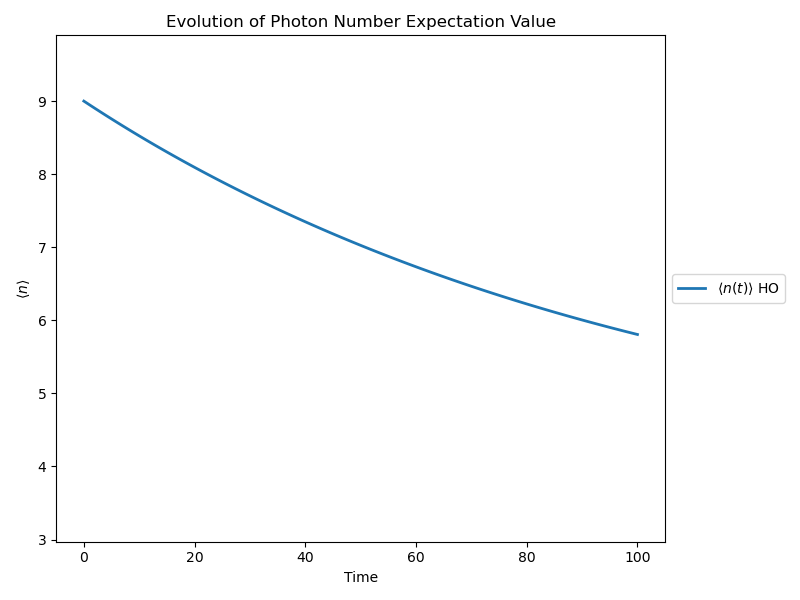

In [3]:
#Display interactive plot
Plot_HO(tlist)

From the above plots we have the ability to examine the system dynamics and simply adjust the sliders to change the behaviour of the system and environment interaction. This code works by running the QuTiP master equation solver <code>mesolve()</code> and storing the states as they are evaluated through time. 

Next let's explore some of the inbuilt QuTiP functions to gain some more insight into the dynamics of the systems. Lets start by using a modified example of the QuTiP function <code>ani_fock_distribution()</code>. This allows us both an ability to see the instantaneous Fock distribution of the state $\rho$ and also see this evolve as we include terms in the Hamiltonian or change coupling strengths. To do this run the cell with the fucntion <code>Plot_Fock(tlist)</code>

In [ ]:
Plot_Fock(tlist)

Output()

From the above we have now seen that although the $\langle \hat{n}\rangle$ provides some insight into the system the Fock distributions show more clearly the effects of the system driving and eventual return to a thermal state. 

<hr>
Recall the quadrature operators
$$
\hat{x} = \frac{\hat{a} + \hat{a}^\dagger}{\sqrt{2}}, \quad \hat{p} = \frac{\hat{a} - \hat{a}^\dagger}{i\sqrt{2}}
$$
We expect for a <b>coherent state</b> a Poissonian distribution with mean photon number $ \langle \hat{n} \rangle = |\alpha|^2 $ and variance $\Delta x_{\text{coh}} = \Delta p_{\text{coh}} = \frac{1}{\sqrt{2}}$ so that 
$$\Delta x_{\text{coh}} \cdot \Delta p_{\text{coh}} = \frac{1}{2}.$$

Where for the thermal states we expect $\Delta x_{\text{th}} = \Delta p_{\text{th}} = \sqrt{\frac{2 n_{\text{th}} + 1}{2}}$ and so 
$$\Delta x_{\text{th}} \cdot \Delta p_{\text{th}} = \frac{2 n_{\text{th}} + 1}{2} \geq \frac{1}{2}.$$
<br> <br>

Using this we then say that for the steady state $\rho_{ss}$ if we find $ \Delta x \cdot \Delta p > \frac{1}{2} $, the state is likely thermal. Additionally then if $ \Delta x \cdot \Delta p  \approx \frac{1}{2} $, the state is likely a coherent state.

Further more we use the number operate variances to gleen similar information, as for thermal states and coherent states we expect 
$$ \Delta N_{\text{th}} = \sqrt{n_{\text{th}}^2 + n_{\text{th}}}, \quad \Delta N_{\text{coh}} = \sqrt{\langle \hat{n} \rangle} = \alpha. $$

<br> <br>

<h3>
In fact lets now examine just how similar the system is to a thermal or coherent state in the steady state by running the cell below.   

In [ ]:
Examine_Steady_State()

<h3>
    Phase space distributions
</h3>

Now we journey into the phase space quasi-probability distribution tools available in QuTiP. We start by looking at the same system and plotting the Wigner distribution as the state evolves. 

In [ ]:
# Define the time list
tlist = np.linspace(0, 50, 50)

# Define the size of phase space to plot in
xvec = np.linspace(-5, 5, 200)


Plot_Wigner(tlist,xvec)

<h3>
Or in 3D we can plot the Wigner distribution

In [ ]:
tlist = np.linspace(0, 100, 100)
xvec = np.linspace(-5, 5, 200)
Plot_Wigner_3D(tlist, xvec)

<h2>
    Similarly we plot the Husimi Q fucntion.

In [ ]:
Plot_Q(tlist,xvec)

In [ ]:
Plot_Q_3D(tlist,xvec)

If we want to continue to check for classicality we can use the  <code>Demonstrate_NonClassicality()</code> function below. Here we compute the Wigner distribution for the steady-state $\rho$. If the Wigner distribution $W(\alpha) < 0$ we identify that the state is non-classical. Conversely if $W(\alpha) \geq 0$ everywhere, then we infer that the state may be classical. <br>
We can also compute the Mandel Q Parameter defined as 
$$
Q = \frac{\mathrm{Var}(\hat{n}) - \langle \hat{n} \rangle}{\langle \hat{n} \rangle}.
$$
If we find that $Q$ is negative this indicates sub-Poissonian statistics, meaning the state may be non-classical. For a posative or zero $Q$ the state is Poissonian which is indicative of coherent states or super-Poissonian statistics for thermal states.

In [ ]:
Demonstrate_NonClassicality()